## Multiclass classification of histopathological images of lung and colon tissue

<center>
  <img src="dataset-cover.jpeg" alt="Dataset cover" width="1000">
  <div style="font-size: smaller; font-style: italic;">
    Photo taken from Pixabay at Pexels
  </div>
</center>

Aim of this project is to distinguish **five classes**:
* Colon adenocarcinoma
* Colon benign tissue
* Lung adenocarcinoma
* Lung benign tissue
* Lung squamous cell carcinoma

The dataset utilized consists of lung and colon cancer **histopathological images**, containing 25,000 images. Each image is 768 x 768 pixels in *jpeg* file format. 
We will use **convolutional neural network** and Python with the `PyTorch` framework.


<center>
  <div style="display: flex; flex-direction: row; justify-content: center;">
    <div style="text-align: center; margin: 10px;">
      <img src="lung_colon_image_set\colon_image_sets\colon_aca\colonca1.jpeg" alt="colon aca" width="200">
      <div style="font-size: smaller; font-style: italic;">
      (1) colon adenocarcinoma</div>
    </div>
    <div style="text-align: center; margin: 10px;">
      <img src="lung_colon_image_set\colon_image_sets\colon_n\colonn1.jpeg" alt="colon n" width="200">
      <div style="font-size: smaller; font-style: italic;">
      (2) colon benign tissue</div>
    </div>
    <div style="text-align: center; margin: 10px;">
      <img src="lung_colon_image_set\lung_image_sets\lung_aca\lungaca1.jpeg" alt="lung aca" width="200">
      <div style="font-size: smaller; font-style: italic;">
      (3) lung adenocarcinoma</div>
    </div>
    <div style="text-align: center; margin: 10px;">
      <img src="lung_colon_image_set\lung_image_sets\lung_n\lungn1.jpeg" alt="lung n" width="200">
      <div style="font-size: smaller; font-style: italic;">
      (4) lung benign tissue</div>
    </div>
    <div style="text-align: center; margin: 10px;">
      <img src="lung_colon_image_set\lung_image_sets\lung_scc\lungscc1.jpeg" alt="lung scc" width="200">
      <div style="font-size: smaller; font-style: italic;">
      (5) lung squamous cell carcinoma</div>
    </div>
  </div>
</center>

In [1]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128,128))
])

In [2]:
dataloader_train = ImageFolder(
    "lung_colon_image_set",
    transform=train_transforms
)

image, label = next(iter(dataloader_train))
image.shape

image = image.squeeze().permute(1,2,0)

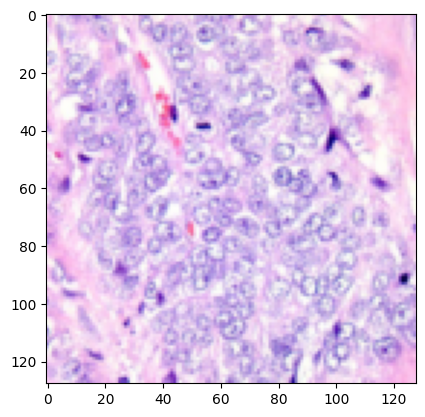

In [3]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

## Convolutional Neural Network

In [5]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, num_classess):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten()
        )
        self.classifer = nn.Linear(64*16*16, num_classess)
    
    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classifer(x)
        return x